# 1. Logistic Regression: Training stability

## (a)
The model training does not seem to converge when trained on dataset B.

## (b)

In [1]:
import src.util as util
import numpy as np
#import src.p01_lr as p1
import matplotlib.pyplot as plt

Load the datasets:

In [2]:
Xa, Ya = util.load_csv('data/ds1_a.csv', add_intercept=True)
Xb, Yb = util.load_csv('data/ds1_b.csv', add_intercept=True)

Plot dataset A:

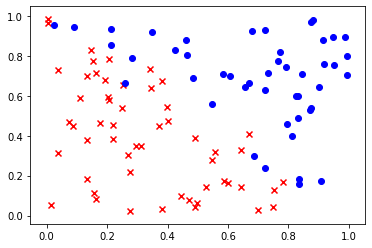

In [3]:
util.plot_points(Xa[:,1:3],Ya==1)

Plot dataset B:

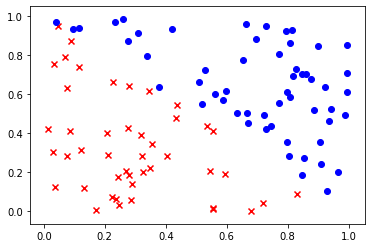

In [4]:
util.plot_points(Xb[:,1:3],Yb==1)

It looks like dataset B is linearly separable, while dataset A clearly is not.

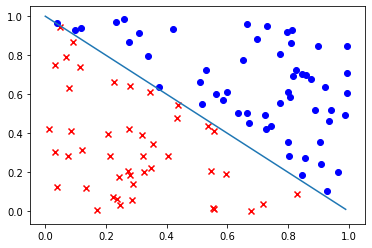

In [5]:
util.plot_points(Xb[:,1:3],Yb==1)
x1 = np.arange(0, 1, 0.01)
x2= np.arange(1,0, -0.01)
plt.plot(x1,x2)

When we look at the code, we see that during training the model is using gradient descent with the following gradient:

In [6]:
def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad

In formulas this means the algorithm is trying to find a zero of the gradient 
$$ \nabla_\theta J(\theta) = -\frac 1m \sum_{i=1}^m \frac{y^{(i)}x^{(i)}}{1+\exp(y^{(i)}\theta^Tx^{(i)})},$$

i.e. it is trying to minimize 
$$ J(\theta) = -\frac 1m \sum_{i=1}^m \log\left( \frac 1{1+\exp(-y^{(i)}\theta^Tx^{(i)})}\right).$$

But because the data in B is linearly separable, at some point gradient descent will find a $\theta$ with
$$ y^{(i)}\theta^T x^{(i)} > 0$$
for all training examples $(x^{(i)},y^{(i)})$.

Such a $\theta$ can always be improved upon by multiplying $\theta$ with a large positive constant. Therefore the gradient descent will never converge.

## (c)

*i. Using a different constant learning rate* 

This will not help, because the argument at the end of (b) would still apply.

*ii. Decreasing the learning rate over time*

If the learning rate is decreasing fast enough, then the stop criteria for the implemented gradient descent algorithm would indicate convergence, but mathematically it would not converge to a minimum of the cost function (because such a minimum doesn't exist).

*iii. Linear scaling of the input features*

After linear scaling the data would still be linearly separable, so this wouldn't fix the problem.

*iv. Adding a regularization term $\|\theta\|_2^2$ to the loss function*

This would lead to convergence, because it punishes the algorithm for lowering the cost function for scaling the components of $\theta$ indefinitely.

*v. Adding zero-mean Gaussian noise to the training data or labels.*

As long as this causes the data to become linearly inseparable, it would work.

## (d)

A support vector machine with the hinge loss (and no regularization) would not have problems with datasets like B, because once the model learned how to separate the data perfectly, the hinge loss will be $0$ and the algorithm will stop.

If the SVM also has $L_2$-regularization, then it will still work on datasets like B, because then the SVM training would approximately try to minimize the geometric margin, which is not affected by scaling $\theta$.